In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Data Generation

In [7]:
observations = 100

xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(low=-10, high=10, size=(observations, 1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez("TF_intro", inputs=generated_inputs, targets = generated_targets) #we use this tensorflow works with NPRs files, not csv or xls

# Solving with Tensorflow

In [8]:
training_data  = np.load("TF_intro.npz")

In [27]:
input_size = 2 # x and z
output_size = 1 #y

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                         kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                         bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                         )
])

# Sequential function that specifes how the model will be laid down ("stack layers")
# Dense takes 2 inputs provided to the model and calculates the dot product of the inputs and the weights and adds the bias
        # output = np.dot(inputs, weights) + bias -> we want to do this 
    
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02) 
model.compile(optimizer=custom_optimizer, loss="mean_squared_error" )
# compile function configures the model for training. second func is loss function

model.fit(training_data["inputs"], training_data["targets"], epochs = 100, verbose=2)
# fit (trains) the model
# epoch = iteration over the full dataset
# verbose = 0, stands for "silent" or no output about the training is displayed

Epoch 1/100
4/4 - 0s - loss: 221.6330 - 158ms/epoch - 39ms/step
Epoch 2/100
4/4 - 0s - loss: 19.6340 - 5ms/epoch - 1ms/step
Epoch 3/100
4/4 - 0s - loss: 14.8718 - 4ms/epoch - 992us/step
Epoch 4/100
4/4 - 0s - loss: 13.7871 - 5ms/epoch - 1ms/step
Epoch 5/100
4/4 - 0s - loss: 11.9503 - 6ms/epoch - 2ms/step
Epoch 6/100
4/4 - 0s - loss: 8.0018 - 4ms/epoch - 1ms/step
Epoch 7/100
4/4 - 0s - loss: 6.2680 - 5ms/epoch - 1ms/step
Epoch 8/100
4/4 - 0s - loss: 4.7485 - 5ms/epoch - 1ms/step
Epoch 9/100
4/4 - 0s - loss: 2.9980 - 5ms/epoch - 1ms/step
Epoch 10/100
4/4 - 0s - loss: 2.3610 - 5ms/epoch - 1ms/step
Epoch 11/100
4/4 - 0s - loss: 1.8765 - 4ms/epoch - 1ms/step
Epoch 12/100
4/4 - 0s - loss: 3.4270 - 5ms/epoch - 1ms/step
Epoch 13/100
4/4 - 0s - loss: 1.3933 - 5ms/epoch - 1ms/step
Epoch 14/100
4/4 - 0s - loss: 0.9068 - 5ms/epoch - 1ms/step
Epoch 15/100
4/4 - 0s - loss: 2.2308 - 5ms/epoch - 1ms/step
Epoch 16/100
4/4 - 0s - loss: 0.8534 - 5ms/epoch - 1ms/step
Epoch 17/100
4/4 - 0s - loss: 2.0252 -

# Extract the weights and bias

- #### 2x - 3z + 5 + noise

In [28]:
model.layers[0].get_weights()

[array([[ 2.074688 ],
        [-3.0707786]], dtype=float32),
 array([4.9969974], dtype=float32)]

# Extract the outputs (make predictions)

In [29]:
model.predict_on_batch(training_data["inputs"]).round(1)

array([[-22.5],
       [ 13.3],
       [  0.7],
       [-14.1],
       [ 12.4],
       [  1.2],
       [ 41.7],
       [ 23.2],
       [-24.5],
       [ -1.2],
       [ 20. ],
       [ 42.9],
       [  1.1],
       [ 10.8],
       [-31.7],
       [-37.8],
       [ -7.2],
       [  3.4],
       [  0.1],
       [-34. ],
       [-43.2],
       [  8.9],
       [  2.5],
       [ 14.5],
       [ -1.6],
       [ 11.3],
       [-31.2],
       [ -3.3],
       [-14. ],
       [ -3.6],
       [ 28.6],
       [-28. ],
       [ 29. ],
       [-19.9],
       [ 30.7],
       [-27.8],
       [-34.4],
       [ -5.3],
       [ -7.6],
       [  8. ],
       [-22.7],
       [ 14.6],
       [-22.9],
       [ 44.4],
       [  4.7],
       [ -0.8],
       [ 35.9],
       [ 14.8],
       [-20.7],
       [  2.2],
       [-35.6],
       [-20.8],
       [-17.4],
       [ 32.3],
       [  1.1],
       [-17.5],
       [-31.6],
       [  1.4],
       [ -5. ],
       [ -4.5],
       [ 20.1],
       [ 14.9],
       [

In [21]:
training_data["targets"].round(1)

array([[-21.9],
       [ 13.9],
       [  0.2],
       [-14.3],
       [ 12.1],
       [  1.7],
       [ 41.6],
       [ 22.5],
       [-23.3],
       [ -2.2],
       [ 19.9],
       [ 41.7],
       [  1.5],
       [ 10.5],
       [-30.7],
       [-37.4],
       [ -6.3],
       [  3.4],
       [  0.6],
       [-34. ],
       [-41. ],
       [  9.3],
       [  1.4],
       [ 13.9],
       [ -2.3],
       [ 11. ],
       [-30.4],
       [ -2.8],
       [-13.1],
       [ -2.9],
       [ 27.5],
       [-28. ],
       [ 27.4],
       [-18.4],
       [ 30.3],
       [-26.5],
       [-33.8],
       [ -4.7],
       [ -6.8],
       [  7.8],
       [-22.3],
       [ 13.3],
       [-22.2],
       [ 42.7],
       [  5.3],
       [ -1. ],
       [ 35.4],
       [ 15.2],
       [-20.7],
       [  2.9],
       [-34.2],
       [-20.4],
       [-16.6],
       [ 31.9],
       [  0.7],
       [-17.3],
       [-30.1],
       [  1.2],
       [ -4.1],
       [ -3.4],
       [ 19. ],
       [ 15.3],
       [

## Plotting the data

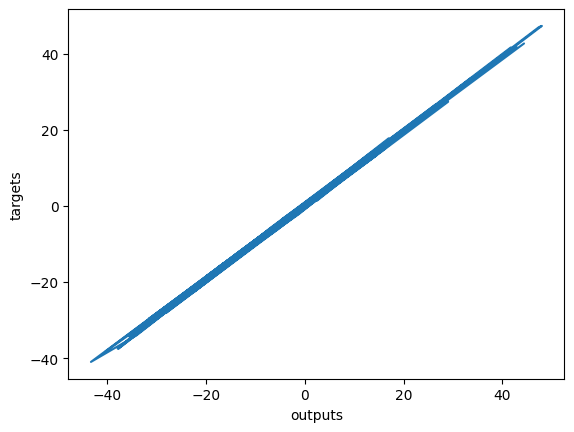

In [30]:
plt.plot(np.squeeze(model.predict_on_batch(training_data["inputs"])), np.squeeze(training_data["targets"]))
plt.xlabel("outputs")
plt.ylabel("targets")
plt.show()

- #### the line should be as close to 45 degree as possible